## Latar Belakang Tugas
Home Credit saat ini menggunakan beragam teknik statistik dan Machine Learning untuk menghasilkan prediksi skor kredit. Kami ingin memanfaatkan potensi penuh dari data yang kami miliki untuk memastikan bahwa pelanggan yang mampu membayar tidak ditolak saat mengajukan pinjaman, dan agar pinjaman diberikan dengan syarat yang akan menginspirasi pelanggan untuk mencapai kesuksesan. Evaluasi akan dilakukan dengan mengukur sejauh mana pemahaman analisis yang kami lakukan. Kami akan menggunakan setidaknya dua model Machine Learning, termasuk salah satunya model Regresi Logistik. Kami akan menyusun sebuah presentasi yang mencakup analisis end-to-end dari hasil pemodelan, serta memberikan rekomendasi bisnis yang relevann)

Studi kasus ini tampaknya menantang dengan lebih dari satu dataframe dan mungkin memerlukan banyak waktu untuk menghasilkan solusi akhir. Dalam notebook ini, kita akan berkonsentrasi hanya pada file utama `application_train` dan data pengujian `application_test`. Ini akan memungkinkan kita untuk menetapkan dasar yang dapat kita tingkatkan dengan file lain melalui teknik rekayasa fitur untuk perbaikan lebih lanjut, sehingga membangun model yang dapat diandalkan dan konsisten yang dapat berperforma baik pada data yang belum pernah dilihat sebelumnya. Jangan khawatir sekarang tentang file lain, saya akan menunjukkan cara untuk mengeksplorasi, menangani, dan mengubahnya menjadi fitur-fitur yang berarti untuk meningkatkan Dasar yang ingin kita bangun dalam notebook ini.

## Goal
Untuk memprediksi client yang gagal bayar dan untuk mengurangi hal tersebut
## Objective
Membangun model prediktif yang dapat mengidentifikasi klien potensial yang dapat membayar kembali pinjaman, serta mengklasifikasikan klien yang berisiko menjadi calon default.

## Metric
Penurunan kerugian dari perusahaan oleh clients

## Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score 

## Import Dataset

In [2]:
df_train = pd.read_csv('dataset/application_train.csv')
df_test = pd.read_csv('dataset/application_test.csv')

## Tampilkan Sampel Data 

In [3]:
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

## Deskripsi Statistik

In [5]:
df_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [6]:
df_test.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [7]:
print('Tipe Data Train: \n')
df_train.info(verbose=True)

Tipe Data Train: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                 

In [8]:
print('Tipe Data Test: \n')
df_test.info(verbose=True)

Tipe Data Test: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 

# Preprocessing

## Cek Data Duplicate

In [9]:
df_train.duplicated().sum()

0

In [10]:
df_test.duplicated().sum()

0

## Tipe Column

In [11]:
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [12]:
df_test.dtypes.value_counts()

float64    65
int64      40
object     16
Name: count, dtype: int64

## Data Overview

In [13]:
pd.set_option('display.max_rows', 30)
def info(table):
    print(f'\n the shape of the table is : \n',table.shape)
    print('-' * 80)
    print('\n data types : ', table.dtypes.value_counts().sort_values())
    print('-' * 80)
    missings=table.isna().mean()[table.isna().mean().sort_values(ascending=False)!=0].sort_values(ascending=False)
    print('-' * 80)
    print('\n number of features having missing data : ',len(missings))
    print('-' * 80)
    print('\n missing data in the table: \n',missings)
    print('-' * 80)
    print(missings[missings>0.5])
    print('-' * 80)
    print('\n missing data over 50% : ',len(missings[missings>0.5]))
info(df_train)  
info(df_test)


 the shape of the table is : 
 (307511, 122)
--------------------------------------------------------------------------------

 data types :  object     16
int64      41
float64    65
Name: count, dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 number of features having missing data :  67
--------------------------------------------------------------------------------

 missing data in the table: 
 COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
                              ...   
EXT_SOURCE_2                0.002146
AMT_GOODS_PRICE             0.000904
AMT_ANNUITY                 0.000039
CNT_FAM_MEMBERS             0.000007
DAYS_LAST_PHONE_CHANGE      0.000003
Length: 67, dtype: float64
----------------------------------

In [14]:
df_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [15]:
df_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

Data yang sedang kita kerjakan memiliki `307511` observasi dan `122` kolom, hanya `16` di antaranya bersifat kategoris dan sisanya numerik. Namun, masalah yang kita hadapi di sini adalah jumlah besar **data yang hilang** dengan **67** kolom mengandung informasi yang hilang dengan proporsi lebih dari **60%**, melebihi ambang batas 50% dari ketidaktersediaan data yang hilang. Untuk mengatasi masalah ini, kita harus melakukan analisis lebih lanjut dan memilih strategi terbaik untuk menanganinya, jadi mari kita mulai dengan analisis terlebih dahulu dan simpan tugas ini untuk langkah pengolahan.

## Handling Missing Value

### Drop fitur yang Nullnya lebih dari 50%

In [16]:
df_train.drop(df_train.iloc[:, 44:91], inplace=True, axis=1)
df_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [17]:
print('Missing values status:', df_train.isnull().values.any())
nvc = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


index  Total Null Values  Percentage
0              OCCUPATION_TYPE              96391   31.345545
1                 EXT_SOURCE_3              60965   19.825307
2   AMT_REQ_CREDIT_BUREAU_WEEK              41519   13.501631
3   AMT_REQ_CREDIT_BUREAU_HOUR              41519   13.501631
4    AMT_REQ_CREDIT_BUREAU_DAY              41519   13.501631
..                         ...                ...         ...
68            FLAG_DOCUMENT_18                  0    0.000000
69            FLAG_DOCUMENT_17                  0    0.000000
70            FLAG_DOCUMENT_16                  0    0.000000
71            FLAG_DOCUMENT_15                  0    0.000000
72               DAYS_EMPLOYED                  0    0.000000

[73 rows x 3 columns]

### Isi Data Null

In [18]:
category_columns = df_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if(column in category_columns):
            df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
        else:
            df_train[column]=df_train[column].fillna(df_train[column].median())

In [19]:
print('Missing values status:', df_train.isnull().values.any())
df_train.isnull().sum()

Missing values status: False


SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

### Drop fitur yang Nullnya lebih dari 50%

In [20]:
df_test.drop(df_test.iloc[:, 43:90], inplace=True, axis=1)
df_test.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [21]:
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


index  Total Null Values  Percentage
0               OCCUPATION_TYPE              15605   32.014197
1                  EXT_SOURCE_3               8668   17.782701
2    AMT_REQ_CREDIT_BUREAU_YEAR               6049   12.409732
3     AMT_REQ_CREDIT_BUREAU_QRT               6049   12.409732
4     AMT_REQ_CREDIT_BUREAU_MON               6049   12.409732
..                          ...                ...         ...
67   REG_REGION_NOT_LIVE_REGION                  0    0.000000
68   REG_REGION_NOT_WORK_REGION                  0    0.000000
69  LIVE_REGION_NOT_WORK_REGION                  0    0.000000
70       REG_CITY_NOT_LIVE_CITY                  0    0.000000
71       REG_CITY_NOT_WORK_CITY                  0    0.000000

[72 rows x 3 columns]

### Isi Data Null

In [22]:
category_columns = df_test.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test:
    if df_test[column].isnull().any():
        if(column in category_columns):
            df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
        else:
            df_test[column]=df_test[column].fillna(df_test[column].median())

In [23]:
print('Missing values status:', df_test.isnull().values.any())
df_test.isnull().sum()

Missing values status: False


SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 72, dtype: int64

# Exploratory Data Analysis

## Proporsi Fitur Target

> 1: klien mengalami kesulitan pembayaran

> 0: pinjaman dilunasi tepat waktu

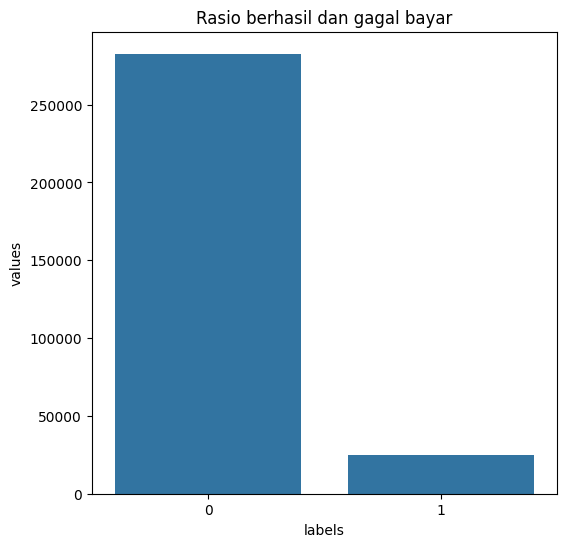

In [24]:
temp = df_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Rasio berhasil dan gagal bayar')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [25]:
grp = df_train['TARGET'].value_counts(normalize=True)
grp.reset_index().style.background_gradient(cmap='Blues')

Berdasarkan data yang ditamplikan bahwa orang yang dapat melunasi dengan tepat waktu sangat banyak  dari pada yang gagal bayar

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>],
       [<Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>],
       [<Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'ce

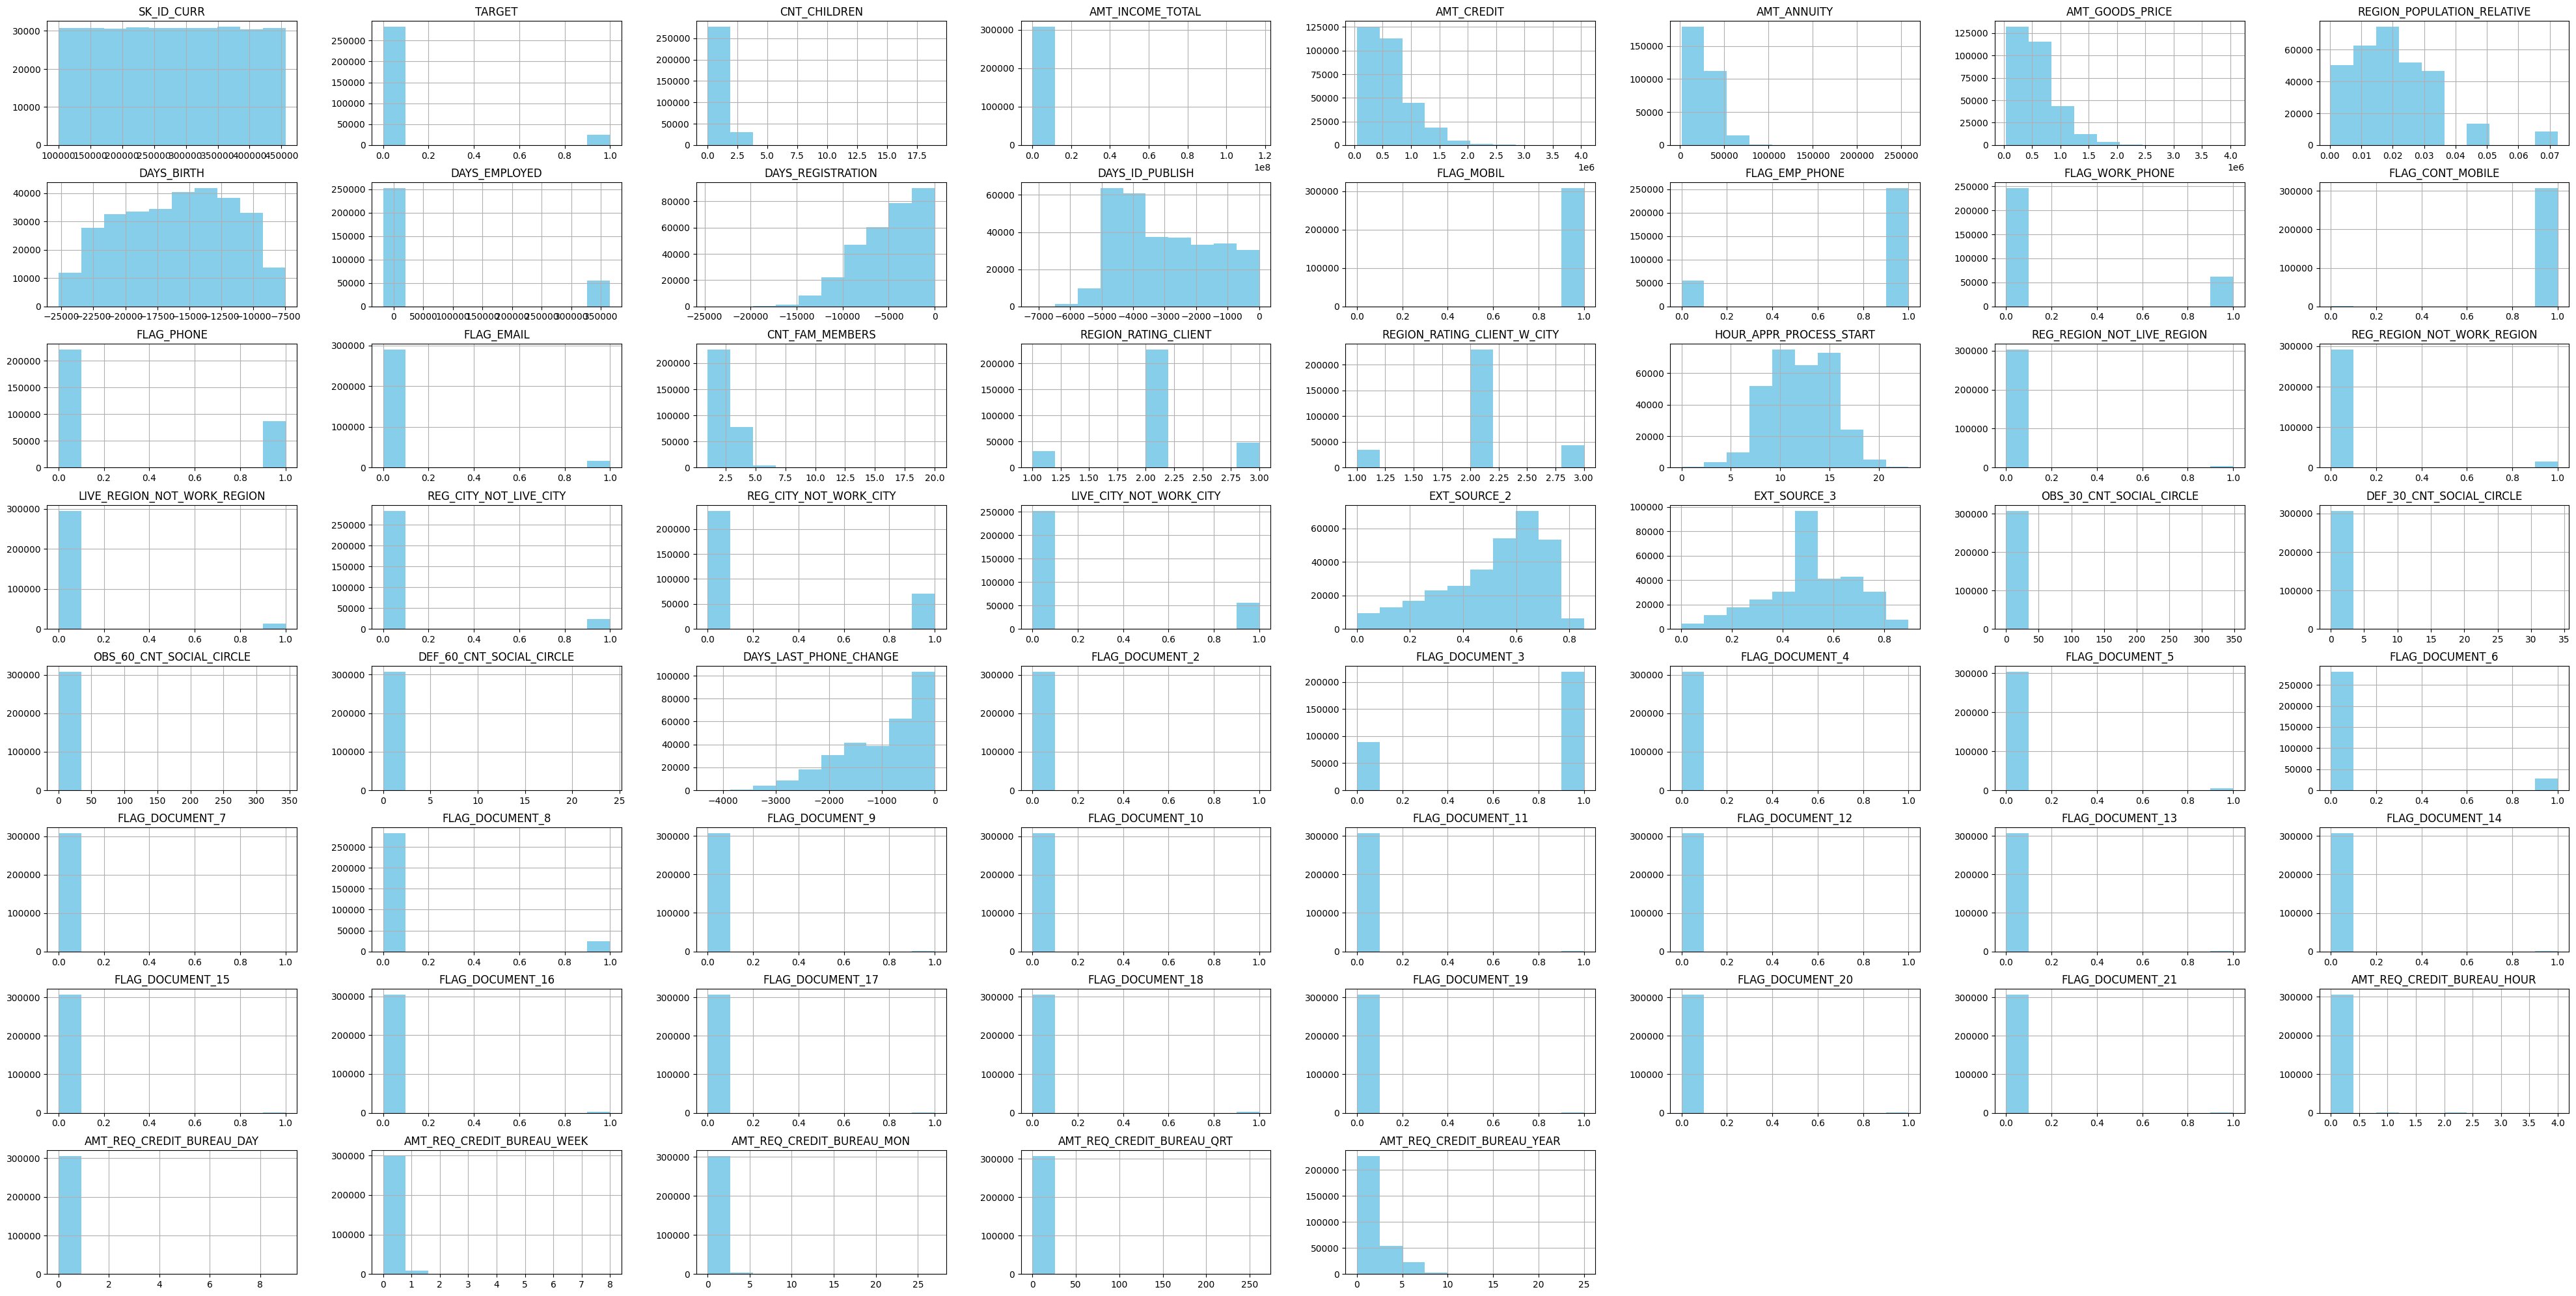

In [26]:
df_train.hist(figsize=(50,25),color='skyblue')

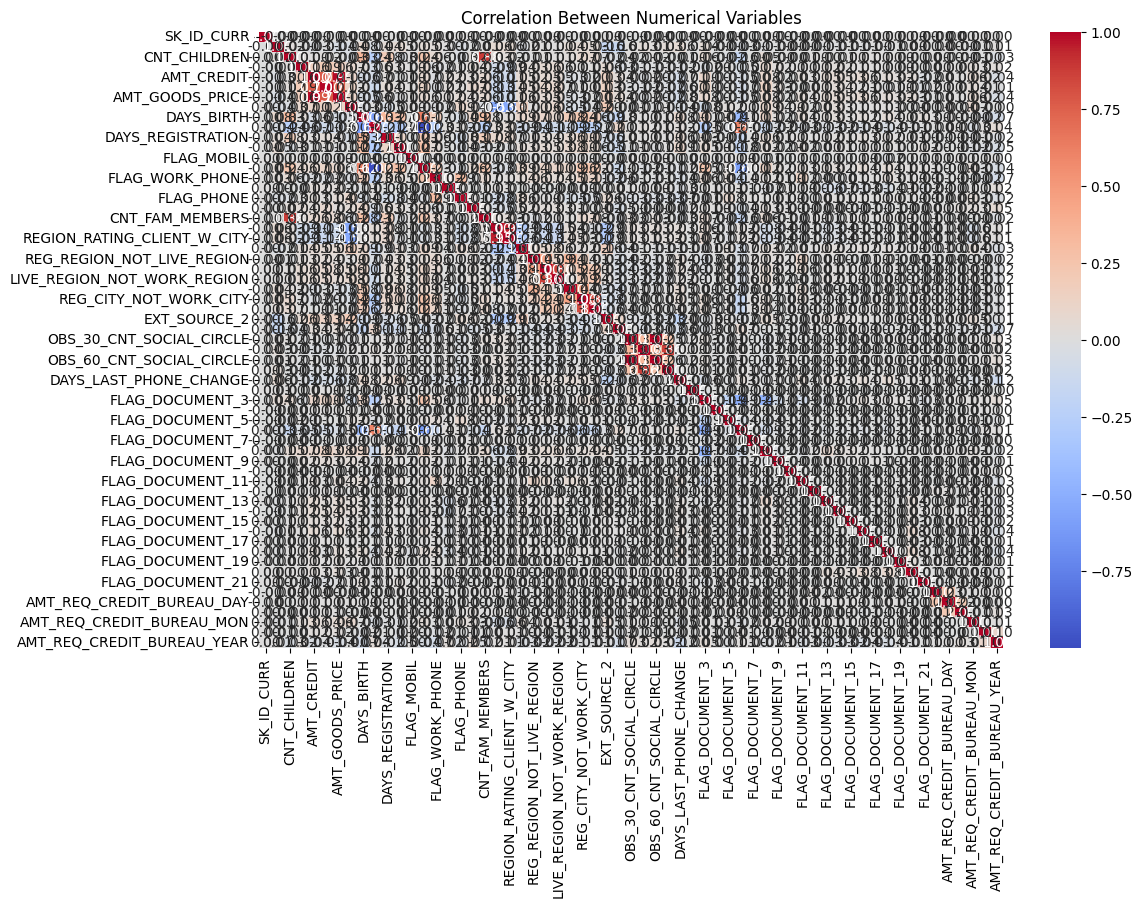

In [27]:
# Korelasi Antar Variabel Numerik
numerical_vars = df_train.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_train[numerical_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Variables')
plt.show()

## Gender

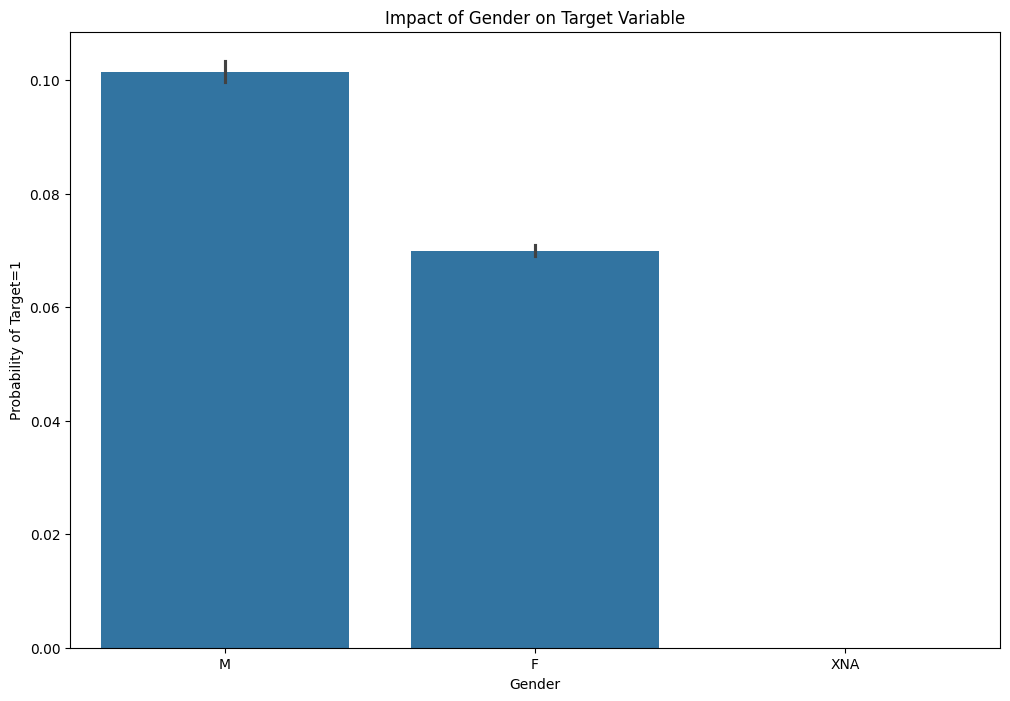

In [28]:
# Pengaruh Variabel Kategorikal terhadap Variabel Target
plt.figure(figsize=(12, 8))
sns.barplot(x='CODE_GENDER', y='TARGET', data=df_train, estimator=lambda x: sum(x) / len(x))
plt.title('Impact of Gender on Target Variable')
plt.xlabel('Gender')
plt.ylabel('Probability of Target=1')
plt.show()

### Umur

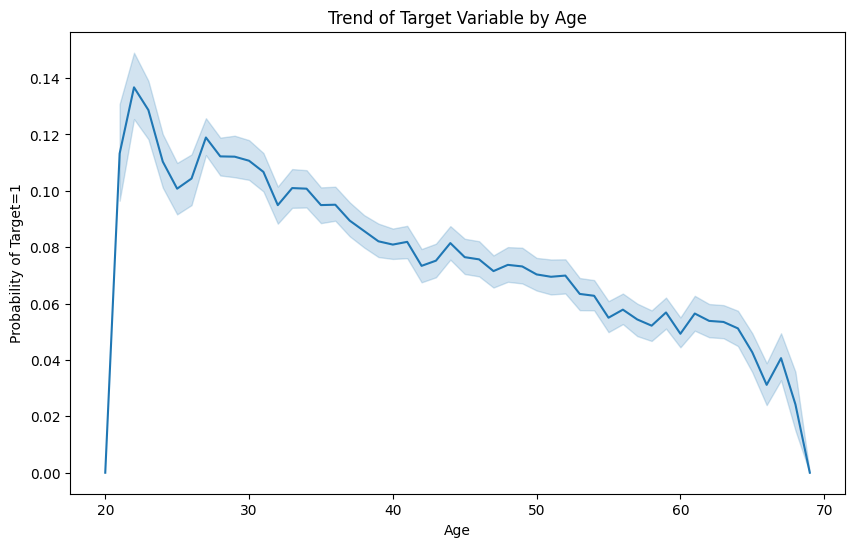

In [29]:
df_train['AGE'] = -df_train['DAYS_BIRTH'] // 365
plt.figure(figsize=(10, 6))
sns.lineplot(x='AGE', y='TARGET', data=df_train)
plt.title('Trend of Target Variable by Age')
plt.xlabel('Age')
plt.ylabel('Probability of Target=1')
plt.show()

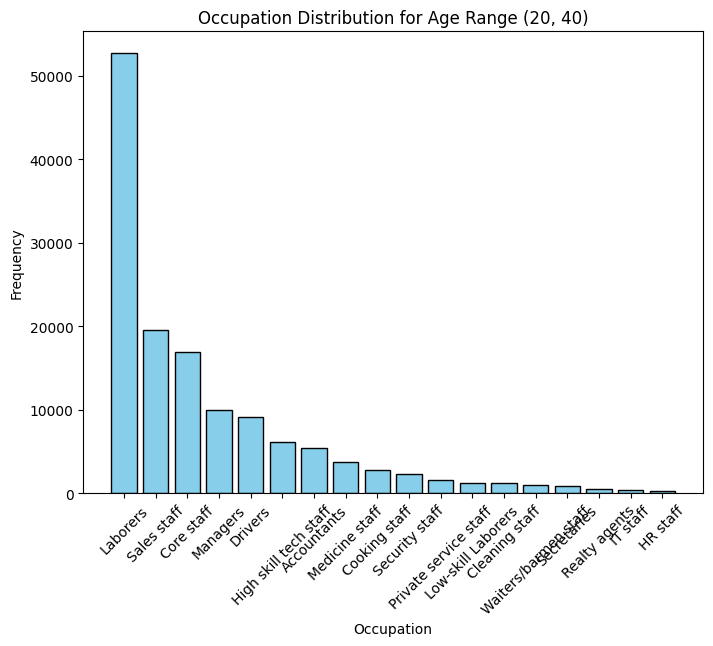

In [30]:
age_range = (20, 40)

selected_df = df_train[(df_train['AGE'] >= age_range[0]) & (df_train['AGE'] <= age_range[1])]
occupation_counts = selected_df['OCCUPATION_TYPE'].value_counts()

# Plot histogram dengan plt
plt.figure(figsize=(8, 6))
plt.bar(occupation_counts.index, occupation_counts.values, color='skyblue', edgecolor='black')
plt.title('Occupation Distribution for Age Range {}'.format(age_range))
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

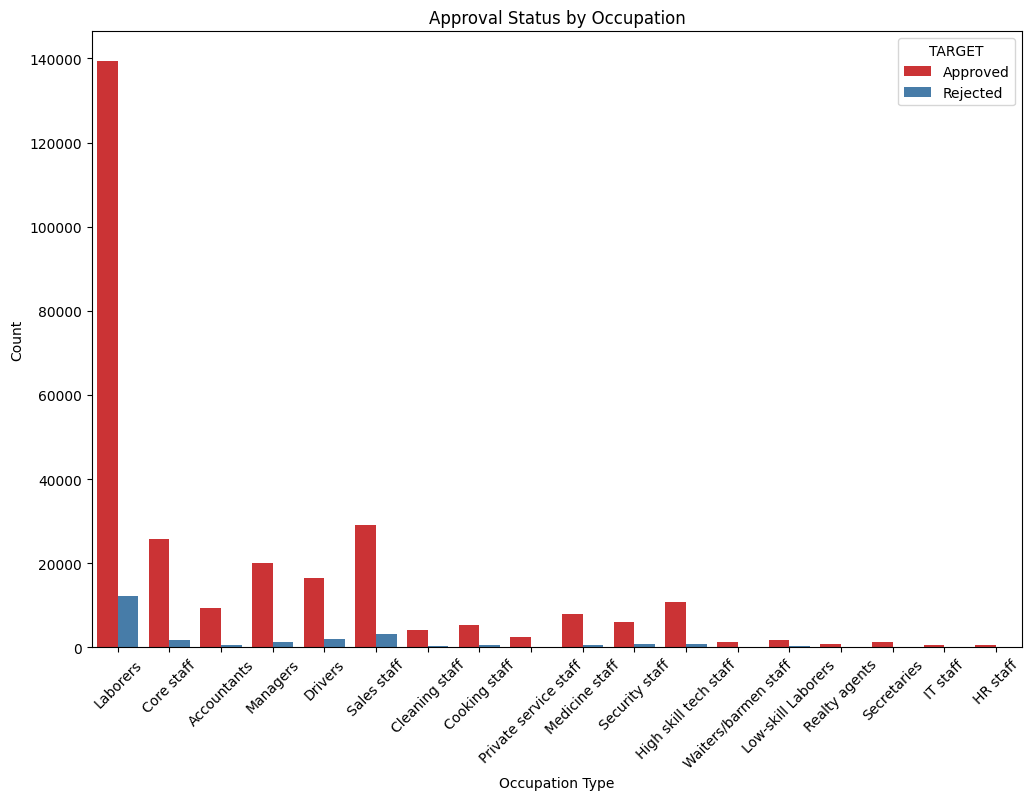

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=df_train, palette='Set1')
plt.title('Approval Status by Occupation')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.legend(title='TARGET', labels=['Approved', 'Rejected'])
plt.xticks(rotation=45)
plt.show()

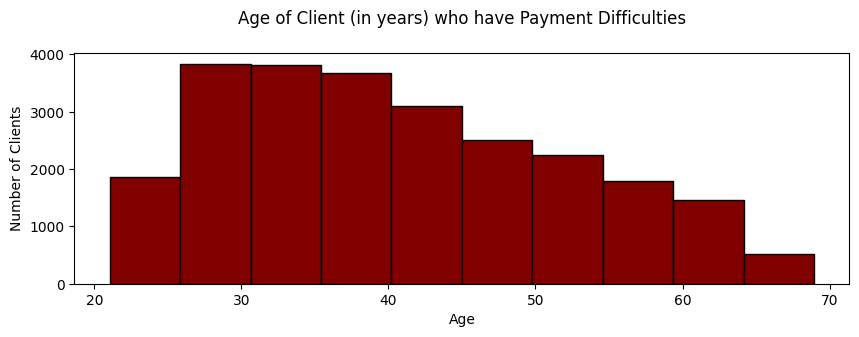

In [32]:
plt.figure(figsize=(10,3))
plt.hist(df_train[df_train['TARGET']==1]['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

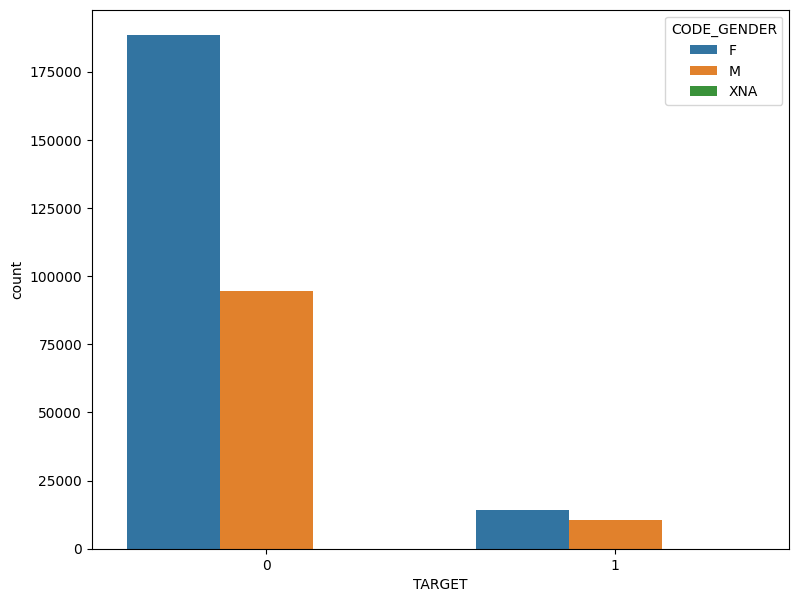

In [33]:
plt.figure(figsize=(9, 7))  # Set the desired figure size
sns.countplot(x=df_train['TARGET'], hue=df_train['CODE_GENDER'])
plt.show()

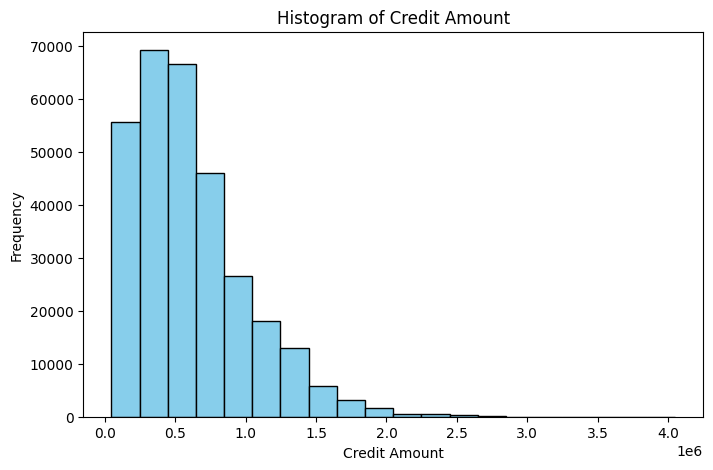

In [34]:
plt.figure(figsize=(8, 5))
plt.hist(df_train['AMT_CREDIT'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

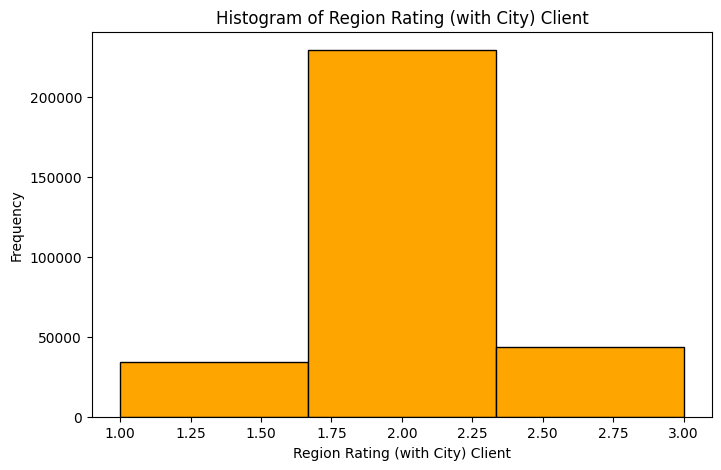

In [35]:
plt.figure(figsize=(8, 5))
plt.hist(df_train['REGION_RATING_CLIENT_W_CITY'], bins=3, color='orange', edgecolor='black')
plt.title('Histogram of Region Rating (with City) Client')
plt.xlabel('Region Rating (with City) Client')
plt.ylabel('Frequency')
plt.show()

## Tipe Kontrak

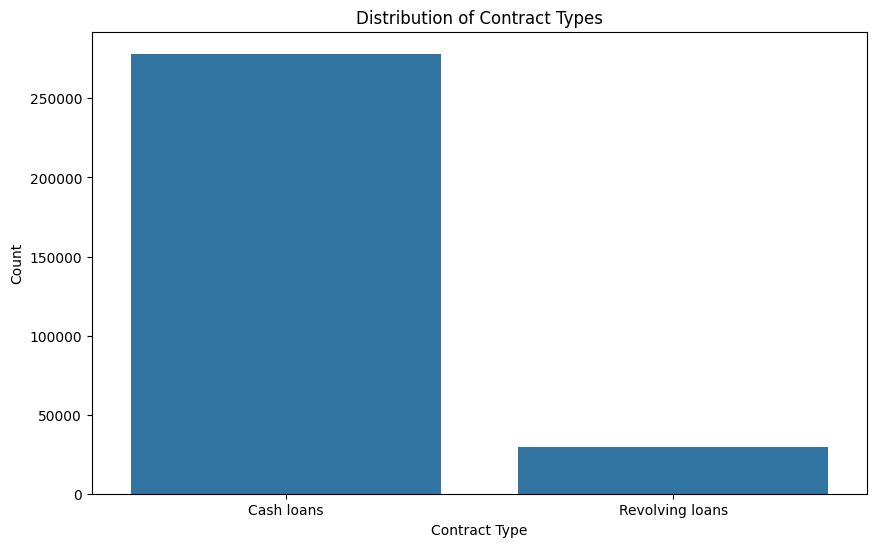

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_TYPE', data=df_train)
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

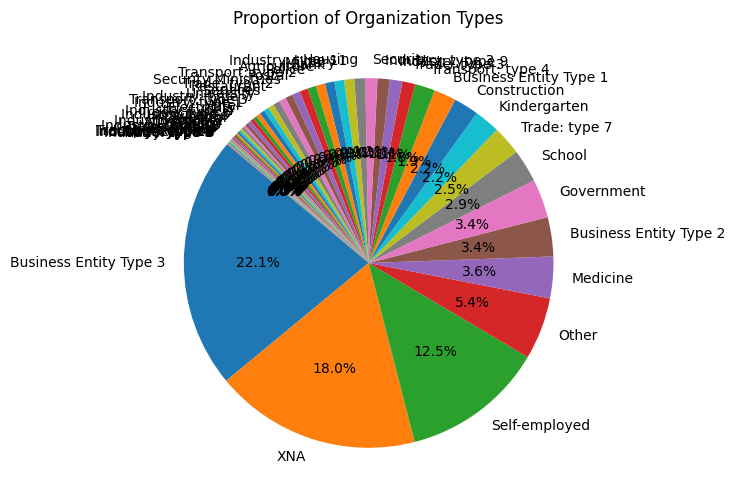

In [37]:
organization_counts = df_train['ORGANIZATION_TYPE'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(organization_counts, labels=organization_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Organization Types')
plt.show()

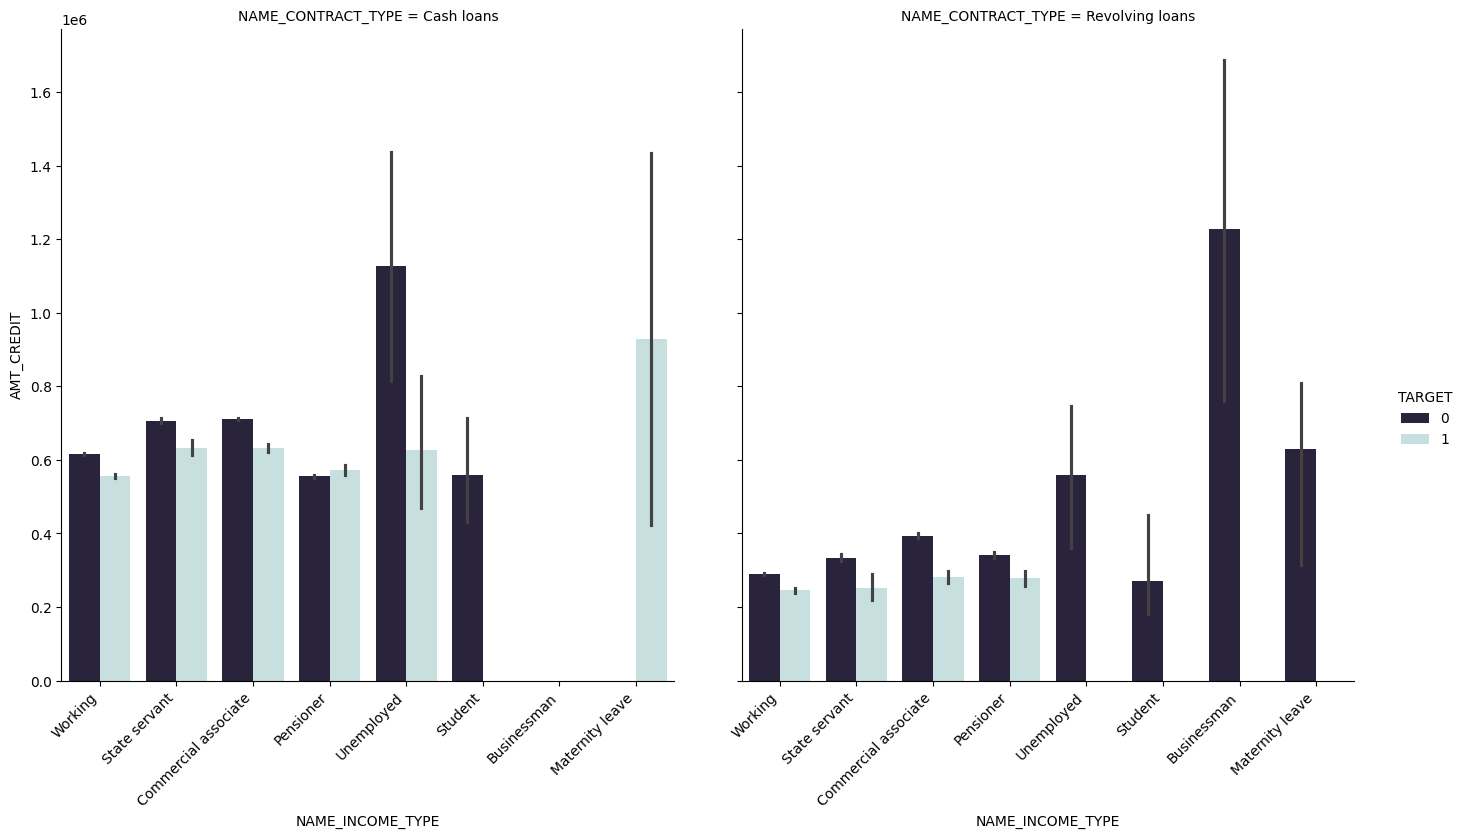

In [38]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [39]:
rt = df_train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Greys')

Clients Repayment Abilities By Income Type


## Education

In [40]:
et = df_train.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Education Type')
et.sort_values(by='SK_ID_CURR', ascending=False)
et.style.background_gradient(cmap='Greys')

Clients Repayment Abilities By Education Type


# Machine Learning Model

In [41]:
df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [42]:
df_train.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 0                 0   
4  ...                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  
0                        0.0                         1.0   25  
1                        0.0                         0.0   45  
2                        0.0                         0.0   52  
3                        0.0                         1.0   52  
4                        0.0                         0.0   54  

[5 rows x 74 columns]

In [43]:
df_train.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [44]:
df_train.iloc[:,16:20] = df_train.iloc[:,16:20].abs()
df_train.iloc[:,45] = df_train.iloc[:,45].abs()

### Fitur 

In [45]:
x = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

In [46]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



Features         Score
16               DAYS_EMPLOYED  1.954124e+08
8              AMT_GOODS_PRICE  1.223080e+08
6                   AMT_CREDIT  7.669987e+07
15                  DAYS_BIRTH  2.235391e+06
5             AMT_INCOME_TOTAL  1.624102e+06
..                         ...           ...
48             FLAG_DOCUMENT_5  3.020010e-02
63            FLAG_DOCUMENT_20  1.425955e-02
65  AMT_REQ_CREDIT_BUREAU_HOUR  1.832008e-03
22            FLAG_CONT_MOBILE  7.863447e-05
19                  FLAG_MOBIL  2.855786e-07

[72 rows x 2 columns]

## Splitting Data

In [47]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns = ['TARGET'])
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=109)

### Inbalance Dataset

In [48]:
y_train.value_counts()

TARGET
0    198056
1     17201
Name: count, dtype: int64

## Resampling Data

In [49]:
df_majority = df_train[(df_train['TARGET']==0)] 
df_minority = df_train[(df_train['TARGET']==1)] 

df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples= 282686,
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority])

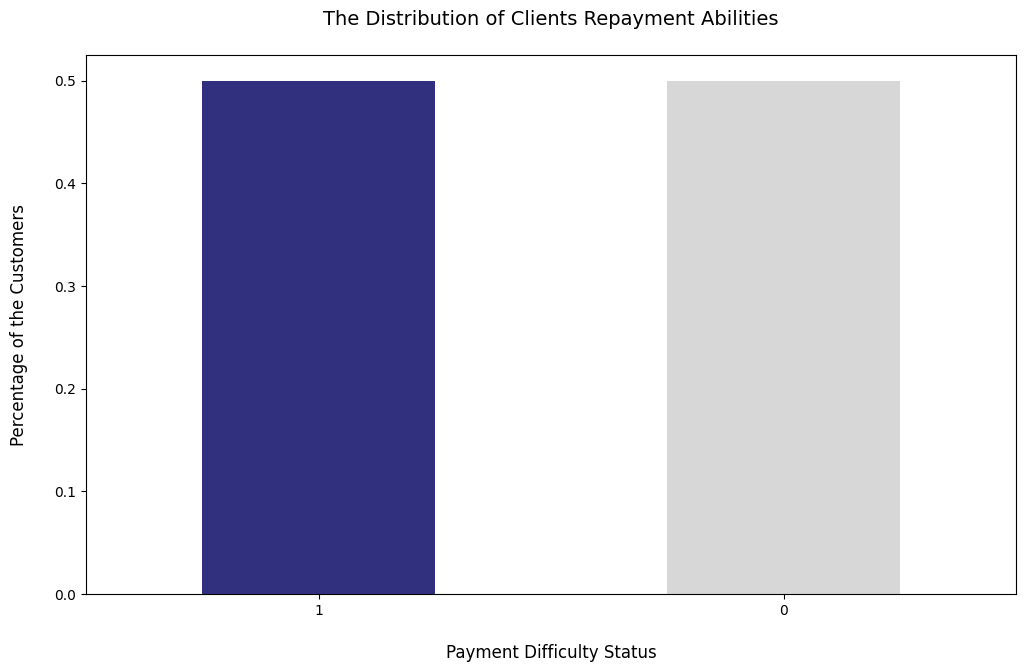

In [50]:
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

## Feature Selection

In [60]:
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_upsampled['TARGET']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


## Normalisasi

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Pembangunan Model

### Regresi Logistik

In [63]:
logreg_model = LogisticRegression().fit(X_train, y_train)
print(logreg_model)

LogisticRegression()


In [64]:
y_test_pred_logreg = logreg_model.predict(X_test)

print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_logreg))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56501
           1       0.68      0.66      0.67     56574

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



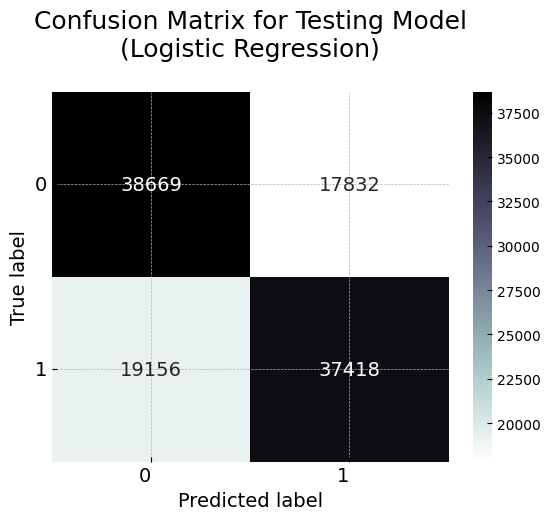

In [91]:
confusion_matrix_log = confusion_matrix(y_test, y_test_pred_logreg)
plt.figure()
sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.xticks(rotation=0, ha='right', fontsize=14)
plt.yticks(rotation=0, ha='right', fontsize=14)
plt.show()

In [65]:
acc_log_train=round(logreg_model.score(X_train,y_train)*100,2)
acc_log_test=round(logreg_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 67.16
Test Accuracy: % 67.29


In [66]:
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_logreg),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6729


### Random Forest

In [67]:
randomforest_model = RandomForestClassifier().fit(X_train, y_train)
print(randomforest_model)

RandomForestClassifier()


In [68]:
y_test_pred_rf = randomforest_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56501
           1       0.99      1.00      1.00     56574

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



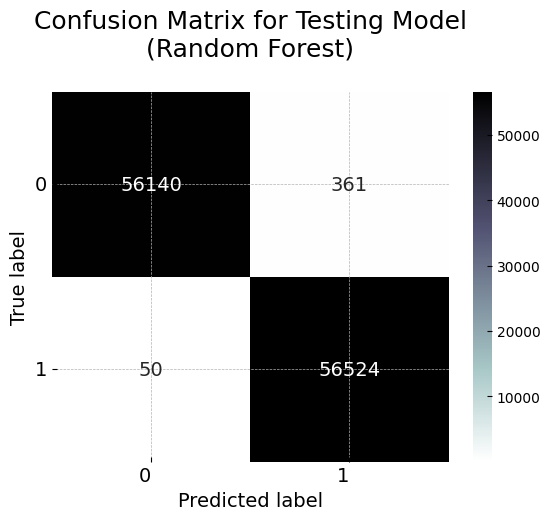

In [89]:
confusion_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure()
sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.xticks(rotation=0, ha='right', fontsize=14)
plt.yticks(rotation=0, ha='right', fontsize=14)
plt.show()


In [70]:
acc_rf_train=round(randomforest_model.score(X_train,y_train)*100,2)
acc_rf_test=round(randomforest_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 99.64


In [71]:
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9964


## Perbandingan Performa Model

In [72]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression',
               'Random Foorest',],
    'Score' : [acc_log_test, acc_rf_test]
})

models.sort_values(by = 'Score', ascending = False)

Model  Score
1       Random Foorest  99.64
0  Logistic Regression  67.29

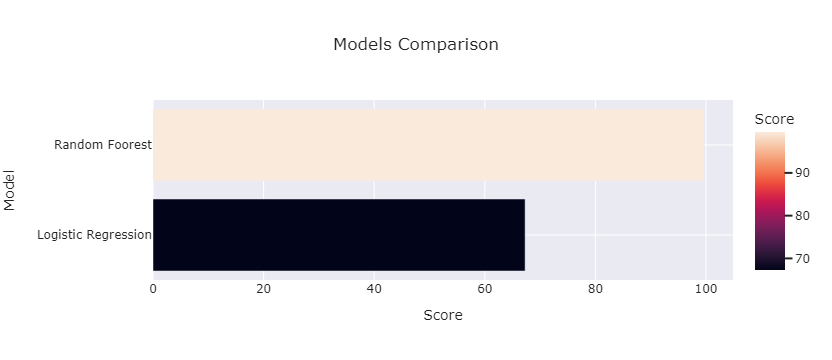

In [73]:
import plotly.express as px

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'seaborn', 
       title = 'Models Comparison')

## Fitur Penting

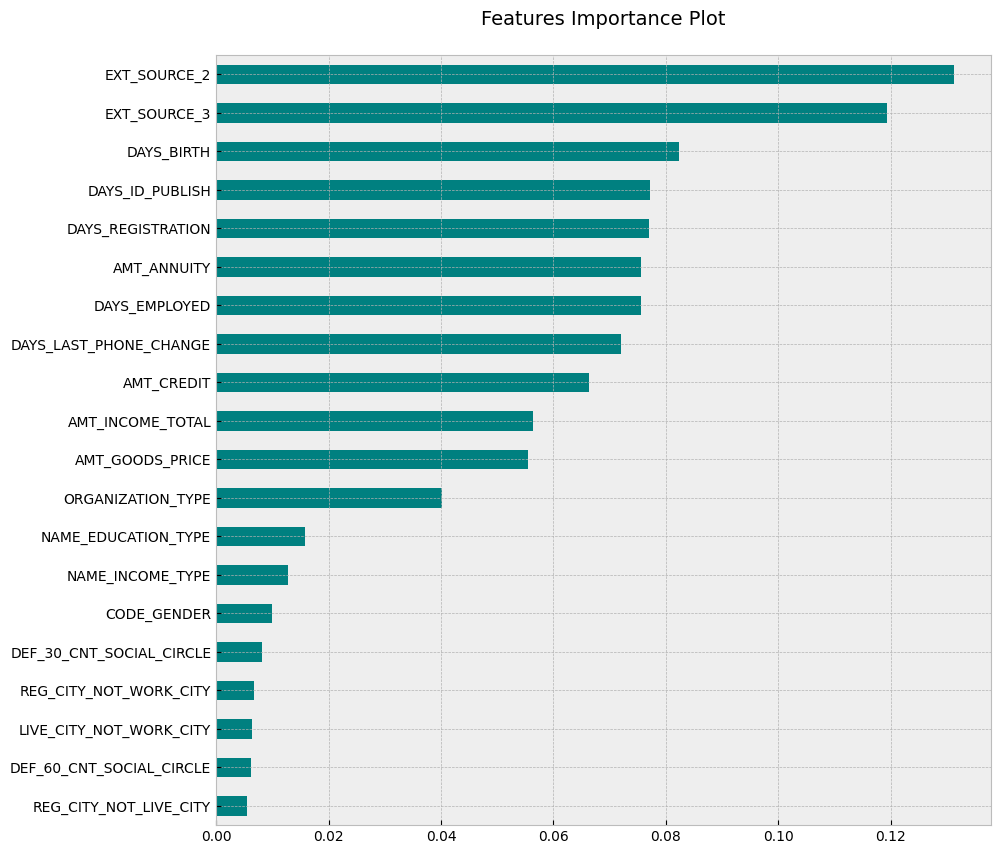

In [75]:
importances_rf = pd.Series(randomforest_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

plt.style.use('bmh')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

# Prediksi

In [76]:
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)
df_test.head()

This dataset has 48744 rows dan 72 columns.



SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           0                   0            0             0                1   
1           1                   0            1             0                1   
2           2                   0            1             1                1   
3           3                   0            0             0                1   
4           4                   0            1             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0               272        1320         2344         450000.0   
1             0               181         379         1820         180000.0   
2             0               402        1548         7132         630000.0   
3             2               492        2731         6049        1575000.0   
4             1               366        1456         4108         625500.0   

   ... FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0  ...                0                 0                 0                 0   
1  ...                0                 0                 0                 0   
2  ...                0                 0                 0                 0   
3  ...                0                 0                 0                 0   
4  ...                0                 0                 0                 0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        0.0                         2.0  

[5 rows x 72 columns]

## Cek Null Value Data Test

In [77]:
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False


index  Total Null Values  Percentage
0                   SK_ID_CURR                  0         0.0
1           NAME_CONTRACT_TYPE                  0         0.0
2              FLAG_DOCUMENT_8                  0         0.0
3              FLAG_DOCUMENT_7                  0         0.0
4              FLAG_DOCUMENT_6                  0         0.0
..                         ...                ...         ...
67            FLAG_CONT_MOBILE                  0         0.0
68             FLAG_WORK_PHONE                  0         0.0
69              FLAG_EMP_PHONE                  0         0.0
70                  FLAG_MOBIL                  0         0.0
71  AMT_REQ_CREDIT_BUREAU_YEAR                  0         0.0

[72 rows x 3 columns]

## Encoding Data Test

In [78]:
# df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
#           "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
#          "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
#           "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
#          "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [84]:
df_test[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "NAME_INCOME_TYPE", 
"NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "ORGANIZATION_TYPE", 
"DAYS_BIRTH", "CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY"]] = df_test[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "NAME_INCOME_TYPE", 
"NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "ORGANIZATION_TYPE", 
"DAYS_BIRTH", "CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY"]].apply(LabelEncoder().fit_transform)

In [85]:
df_test.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           0                   0            0             0                1   
1           1                   0            1             0                1   
2           2                   0            1             1                1   
3           3                   0            0             0                1   
4           4                   0            1             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0               272        1320         2344         450000.0   
1             0               181         379         1820         180000.0   
2             0               402        1548         7132         630000.0   
3             2               492        2731         6049        1575000.0   
4             1               366        1456         4108         625500.0   

   ... FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0  ...                0                 0                 0                 0   
1  ...                0                 0                 0                 0   
2  ...                0                 0                 0                 0   
3  ...                0                 0                 0                 0   
4  ...                0                 0                 0                 0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        0.0                         2.0  

[5 rows x 72 columns]

In [86]:
df_test.iloc[:,16:20] = df_test.iloc[:,16:20].abs()
df_test.iloc[:,45] = df_test.iloc[:,45].abs()

In [87]:
pred_test = df_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
pred_test.head()

DAYS_EMPLOYED  AMT_GOODS_PRICE  AMT_CREDIT  DAYS_BIRTH  AMT_INCOME_TOTAL  \
0           2329         450000.0        1320        4886               272   
1           4469         180000.0         379        6000               181   
2           4458         630000.0        1548        4122               402   
3           1866        1575000.0        2731        9963               492   
4           2191         625500.0        1456       10875               366   

   DAYS_REGISTRATION  DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  AMT_ANNUITY  \
0             5170.0                  1740.0              812         2344   
1             9118.0                     0.0             1623         1820   
2             2175.0                   856.0             3503         7132   
3             2000.0                  1805.0             4208         6049   
4             4000.0                   821.0             4262         4108   

   ORGANIZATION_TYPE  NAME_INCOME_TYPE  REG_CITY_NOT_WORK_CITY  CODE_GENDER  \
0                 28                 6                       0            0   
1                 42                 6                       0            1   
2                 54                 6                       0            1   
3                  5                 6                       0            0   
4                  5                 6                       1            1   

   EXT_SOURCE_2  REG_CITY_NOT_LIVE_CITY  NAME_EDUCATION_TYPE  \
0      0.789654                       0                    1   
1      0.291656                       0                    4   
2      0.699787                       0                    1   
3      0.509677                       0                    4   
4      0.425687                       0                    4   

   DEF_30_CNT_SOCIAL_CIRCLE  EXT_SOURCE_3  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       0.0      0.159520                       0.0   
1                       0.0      0.432962                       0.0   
2                       0.0      0.610991                       0.0   
3                       0.0      0.612704                       0.0   
4                       0.0      0.519097                       0.0   

   LIVE_CITY_NOT_WORK_CITY  
0                        0  
1                        0  
2                        0  
3                        0  
4                        1

In [88]:
submit = df_test[['SK_ID_CURR']]
submit['TARGET'] = randomforest_model.predict_proba(pred_test)[:,1]
submit.head()
# submit.to_csv('submission_LR.csv', index = False)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4596\812946908.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



SK_ID_CURR  TARGET
0           0    0.23
1           1    0.22
2           2    0.19
3           3    0.20
4           4    0.21

## Rekomendasi Bisnis

1. Rancanglah kampanye untuk menarik perhatian lebih banyak mahasiswa, akuntan, staf teknis berpengalaman, serta manajer agar tertarik mengajukan pinjaman.
2. Untuk mendapatkan pemahaman yang lebih mendalam, lakukan survei guna mengetahui apakah terdapat kendala saat klien yang sedang cuti melahirkan atau menganggur mengajukan kontrak pinjaman tunai. Dengan demikian, di masa depan, kita dapat merekomendasikan jenis kontrak yang tepat agar aplikasi mereka mendapat persetujuan.
3. Fokuskan upaya pada klien-klien yang berusia 35-45 tahun yang tidak mengalami kesulitan dalam pembayaran sebagai prioritas utama.

# Repository Github

https://github.com/agusfahmi/HomeCredit-PBI-Rakamin